In [1]:
# In this analysis, I have done the exploratory analysis on Abalone Dataset. Post that I tested the scores for different 
# Regression Algorithms.
# Dataset can be found on https://archive.ics.uci.edu/ml/datasets.php

# Data Set Information:

# Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through 
# the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other
# measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and 
# location (hence food availability) may be required to solve the problem.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Sex / nominal / -- / M, F, and I (infant)
#Length / continuous / mm / Longest shell measurement
#Diameter / continuous / mm / perpendicular to length
#Height / continuous / mm / with meat in shell
#Whole weight / continuous / grams / whole abalone
#Shucked weight / continuous / grams / weight of meat
#Viscera weight / continuous / grams / gut weight (after bleeding)
#Shell weight / continuous / grams / after being dried
#Rings / integer / -- / +1.5 gives the age in years

In [50]:
# Load the dataset, remove headers and name the columns
df=pd.read_csv("D:/2020/Python/ML/Datasets/abalone.data", header=None,
              names=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera weight','Shell_weight',
                    'Ring'])
df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Ring
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [5]:
# For age in years
df['Age'] = df['Ring']+1.5
df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Ring,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5


In [6]:
# Check the info about dataset
df.info()
# We have Sex as an object, rest all as float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell_weight      4177 non-null float64
Ring              4177 non-null int64
Age               4177 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [7]:
# Check if dataset has any null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera weight    0
Shell_weight      0
Ring              0
Age               0
dtype: int64

In [8]:
df.corr()
# Seems all parameters are well correlated with the output field so we will consider all the parameters in the training

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Ring,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Ring,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


In [9]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Ring,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


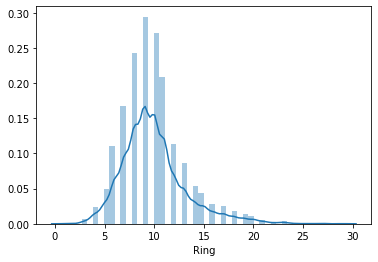

In [10]:
# Let us Analyse the Output field
sb.distplot(df['Ring'])

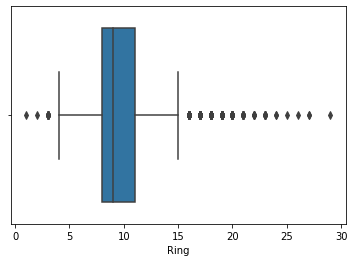

In [11]:
sb.boxplot(df['Ring'])

In [12]:
# from the above plots, we can see that the normal spread is spread in the range of 2Standard Deviation approximately
# Max: 9.933684+2*3.224169 = 16.382022
# Min: 9.933684-2*3.224169 = 3.485346....above box plot shows this fact

In [13]:
# We plot the parameters related to the dimension: Length, Diameter and Height

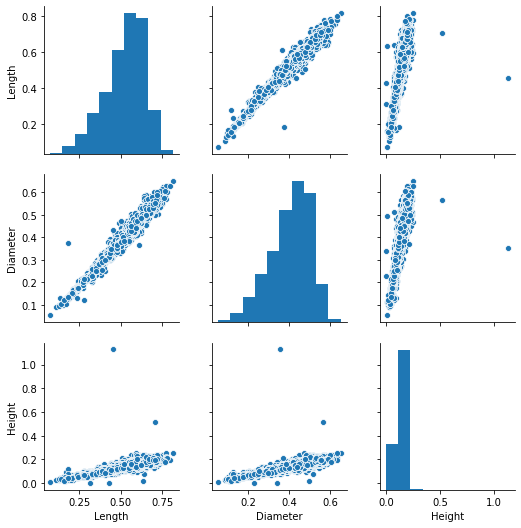

In [14]:
sb.pairplot(df[['Length','Diameter','Height']])
# Here we see that Height is showing some outliers, so let us check for outliers

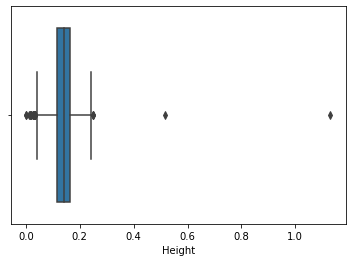

In [15]:
# Try to see the outliers in Height
sb.boxplot(df['Height']) #Shows outliers way beyond the major spread range

(0.0, 0.26)

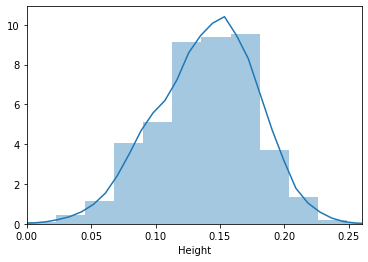

In [16]:
# To better visualize the distribution, we cut the x limits to the major spread of height
s = sb.distplot(df['Height'])
s.set_xlim(0.0,0.26) #setting the range (started with 3, setteled with 0.26 as it shows the maximum distribution)

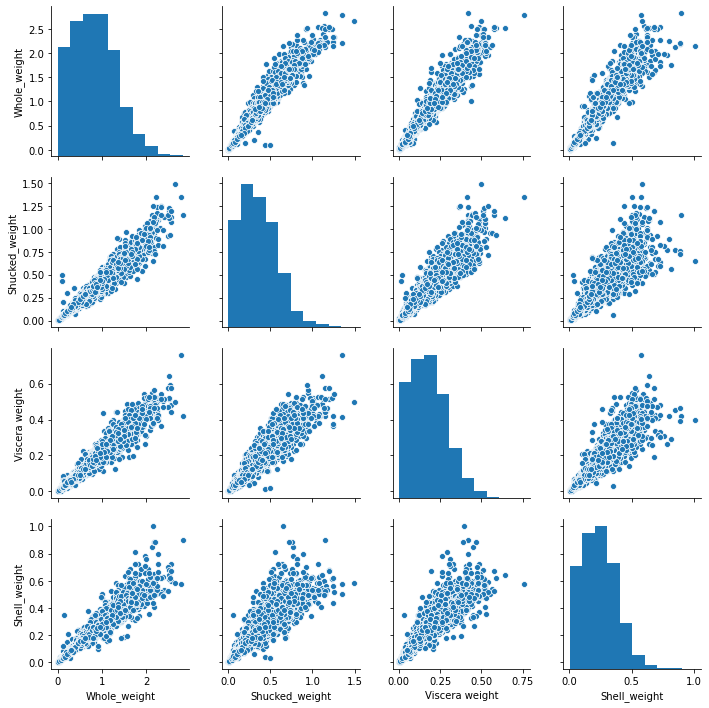

In [17]:
# Similarly, Analysing the Weight factors: Whole_weight, Shucked_weight, Viscera weight, Shell_weight
sb.pairplot(df[['Whole_weight', 'Shucked_weight', 'Viscera weight', 'Shell_weight']])
# We see that distribution area of weight parameters is a bit larger than the dimension parameters

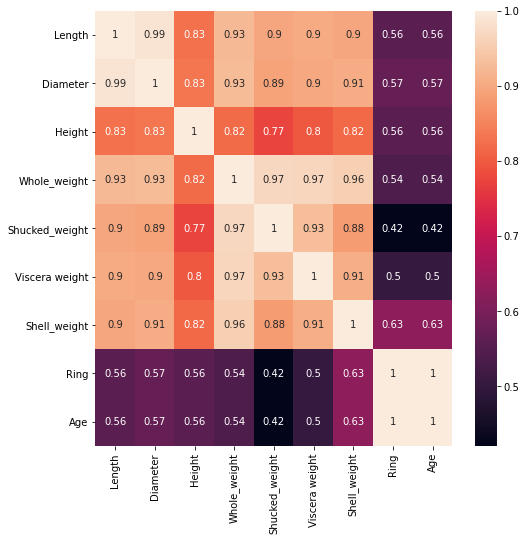

In [18]:
# Multivariate Analysis: Here we visualize how all parameters are correlated to the output parameter. POst this, we will
# explore the most correlated factors
pt = df.corr()
plt.figure(figsize=(8,8))
sb.heatmap(pt, annot=True)

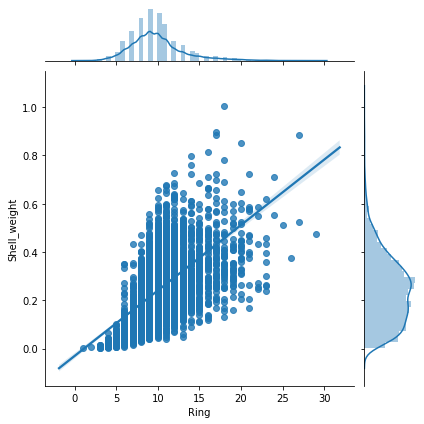

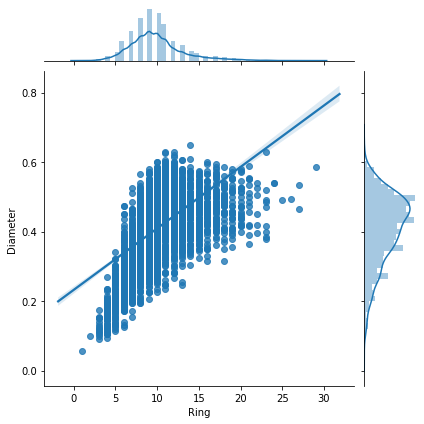

In [19]:
# In the above plot we see that Shell_weight and Diameter are the most strongly correlated to the Ring, so we plot a 
# joint plot to see the density and the scatter plot both

sb.jointplot(data=df, x='Ring', y='Shell_weight', kind='reg')
sb.jointplot(data=df, x='Ring', y='Diameter', kind='reg')

In [20]:
# From the above plot we observed that the shell weight and the diameter remains concentrated below certain level till the
# the ring size of 5 and starts increasing with ring value 5. Further more, with larger values of ring, these two parameters
# start dispersing

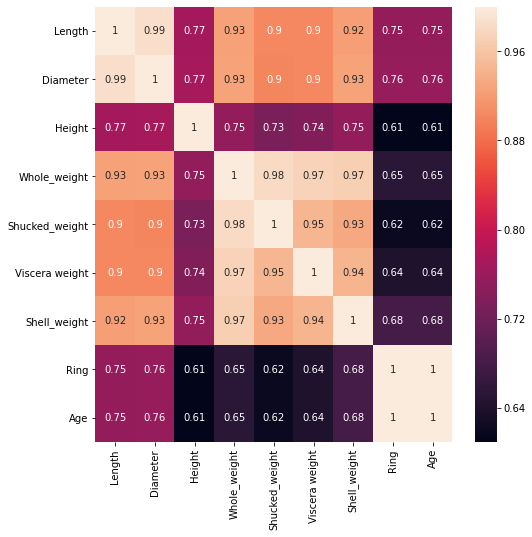

In [21]:
# Let us check how the correlation varies with the number of rings
# Ring size 0 to 10 shows a different pattern as compared to above ring size > 10
# Let us visualize the corelation in these two segments

# Segment-1: Ring size<10
df1 = df[df['Ring']<10]
pt = df1.corr()
plt.figure(figsize=(8,8))
sb.heatmap(pt, annot=True)

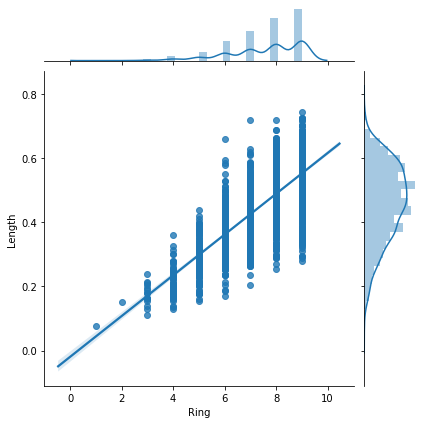

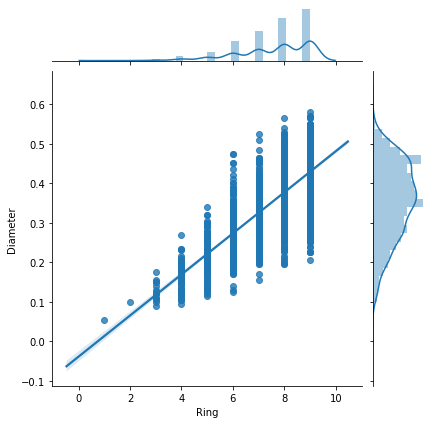

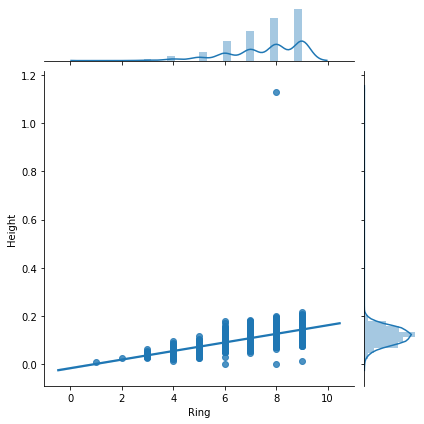

In [22]:
# Noe let us examine the dimension parameters w.r.t rings as they seems more stromgly correlated to rings
sb.jointplot(df1['Ring'], df1['Length'], kind='reg')
sb.jointplot(df1['Ring'], df1['Diameter'], kind='reg')
sb.jointplot(df1['Ring'], df1['Height'], kind='reg')

In [23]:
# Above plots shows that all 3 Dimension parameters starts increasing after the ring size 3

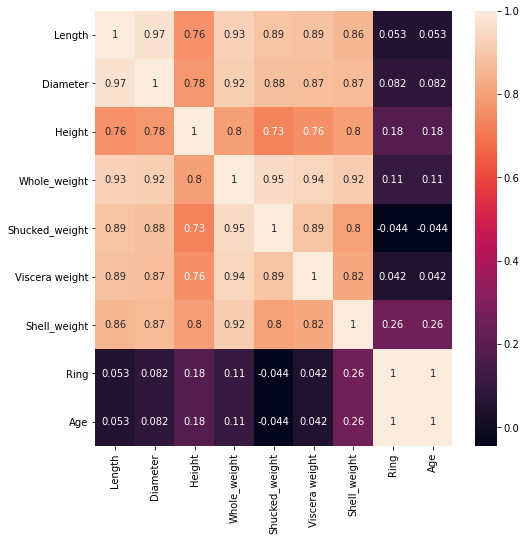

In [24]:
# Segment-2: Ring size>=10
df2 = df[df['Ring']>=10]
pt=df2.corr()
plt.figure(figsize=(8,8))
sb.heatmap(pt, annot=True)

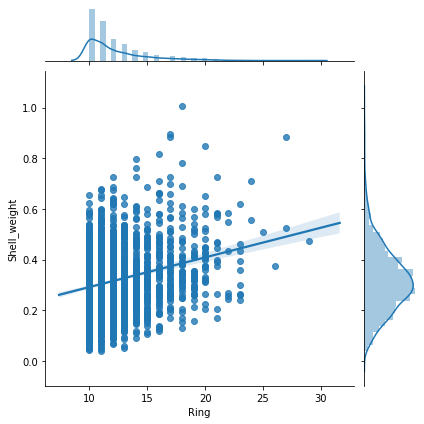

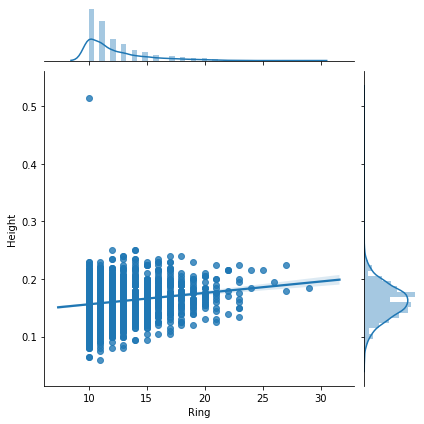

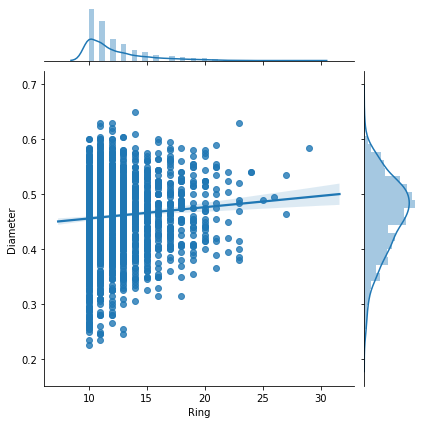

In [25]:
# We clearly see that the correlation of all parameters greatly degrades with more ring size

# Check the weight, height and diameter (just taking these 3 parameters as they wer most correlated to ring size)
sb.jointplot(df2['Ring'], df2['Shell_weight'], kind='reg')
sb.jointplot(df2['Ring'], df2['Height'], kind='reg')
sb.jointplot(df2['Ring'], df2['Diameter'], kind='reg')

In [26]:
# From the above plots, it is clear that the Abalons increase in dimension and weight till the ring size of 10 but after the 
# ring size of 10 to 11, it shows spreading or dispersing pattern so we can say that after ring size of 10 to 11, the development 
# in size and weight depends on environmental factors, which has no significant pattern

In [27]:
# Now let us examine the SEX w.r.t Ring size

In [28]:
# Sex: Thres categories are found : Male, Female and Infant(Which are not adult)
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [29]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

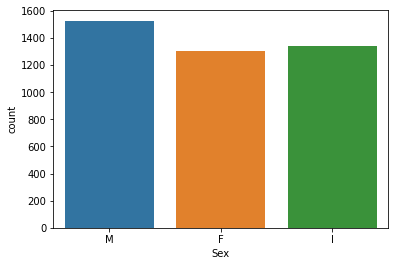

In [30]:
# Visualizing the counts of each category of Sex
sb.countplot(df['Sex'])

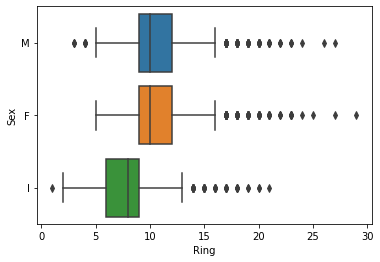

In [31]:
#PLotting the distributin of SEX w.r.t different parameters (I took the major parameters correlated to rings)
sb.boxplot(data=df,x='Ring', y='Sex')

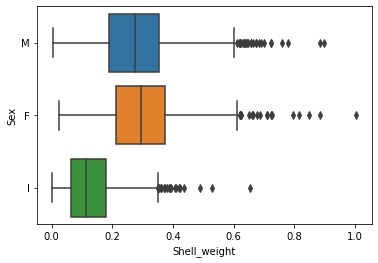

In [32]:
sb.boxplot(data=df,x='Shell_weight', y='Sex')

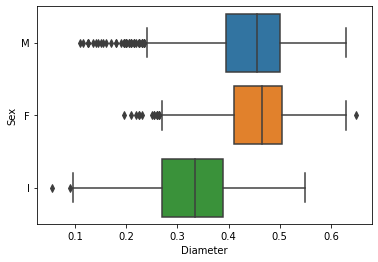

In [33]:
sb.boxplot(data=df,x='Diameter', y='Sex')

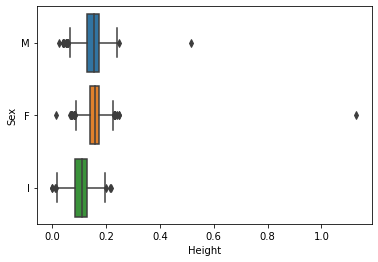

In [34]:
sb.boxplot(data=df,x='Height', y='Sex')

In [35]:
# From al the above plots, we get to know that the median of different parameters for INFANTS are lower as compared to the
# MAle/Female. Distribution of all three categories are concentrated around the mean.

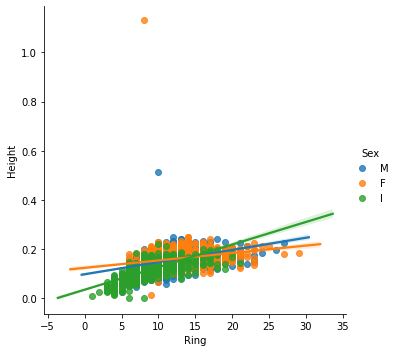

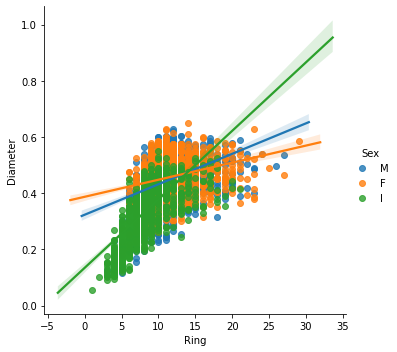

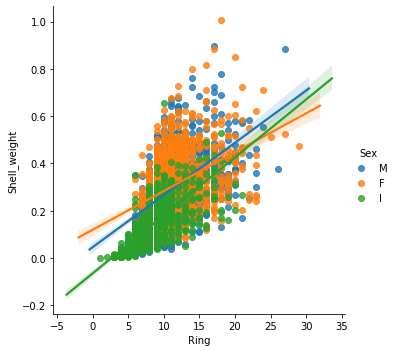

In [36]:
# Let us check te correlation of SEX w.r.t. most storngly correlated parameters "Diameter, Height and Shell_weight"
# Why these parameters?: As these 3 parameters shown a Strong Correlation with lower values of Rings and Infants has lower
# Values as compared to Male/Female. We will plot the Linear Regression plot woth variations in SEX with the help of "HUE"

sb.lmplot(data=df, x='Ring', y='Height', hue='Sex')
sb.lmplot(data=df, x='Ring', y='Diameter', hue='Sex')
sb.lmplot(data=df, x='Ring', y='Shell_weight', hue='Sex')

In [37]:
# Observing all the above lmplots, we see that the Infant line is more inclined as compared to MAale/Female. 
# Plot shows strong correlation of parameters with ring

In [38]:
# Building Regression Models: Applying different classification algorithms

# Preparing dataset

In [39]:
df['Sex_E'] = df['Sex'].replace({'M':1, 'F':2, 'I':3})
df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Ring,Age,Sex_E
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5,1


In [40]:
df1 = df.drop(['Sex'], axis=1)
df1.head(2)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera weight,Shell_weight,Ring,Age,Sex_E
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,16.5,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,8.5,1


In [41]:
dfi = df1.iloc[:, df1.columns != 'Ring']
dfo= df1['Ring']

In [42]:
# Implementing Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [43]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
svr_rbf=SVR(kernel='rbf')

In [44]:
lr=LinearRegression()
lr.fit(dfi,dfo)
lr.score(dfi,dfo)

1.0

In [45]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(dfi,dfo)
svr_lin.score(dfi,dfo)

0.9997250282825754

In [46]:
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(dfi,dfo)
svr_rbf.score(dfi,dfo)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9905376480575866